<a href="https://colab.research.google.com/github/gagand33p/data_analysis_case_study/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Importing transaction files and checking their properties

In [ ]:
#importing transaction detail files and combining them into one dataframe
trans_fact_files = [file for file in os.listdir() if file.startswith('trans_fact')]
trans_fact_dfs = [pd.read_csv(file) for file in trans_fact_files]
trans_fact_combined = pd.concat(trans_fact_dfs, ignore_index=True)

print("Number of rows: ", len(trans_fact_combined))

print("\nMetadata: ")
trans_fact_combined.info()

print("\nDescriptive Statistics Summary: ")
trans_fact_combined.describe()


Number of rows:  51290

Metadata: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   product_id      51290 non-null  object 
 7   sales           51290 non-null  float64
 8   quantity        51290 non-null  int64  
 9   discount        51290 non-null  float64
 10  profit          51290 non-null  float64
 11  shipping_cost   51290 non-null  float64
 12  order_priority  51290 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB

Descriptive Statistics Summary: 


,row_id,sales,quantity,discount,profit,shipping_cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
#Modify data types to correct format
trans_fact_combined['order_date'] = pd.to_datetime(trans_fact_combined['order_date'], infer_datetime_format=True)
trans_fact_combined['ship_date'] = pd.to_datetime(trans_fact_combined['ship_date'], infer_datetime_format=True)

<ipython-input-19-eae25a883a50>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  trans_fact_combined['order_date'] = pd.to_datetime(trans_fact_combined['order_date'], infer_datetime_format=True)


In [ ]:
print("\nMetadata: ")
trans_fact_combined.info()


Metadata: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          51290 non-null  int64         
 1   order_id        51290 non-null  object        
 2   order_date      51290 non-null  datetime64[ns]
 3   ship_date       51290 non-null  datetime64[ns]
 4   ship_mode       51290 non-null  object        
 5   customer_id     51290 non-null  object        
 6   product_id      51290 non-null  object        
 7   sales           51290 non-null  float64       
 8   quantity        51290 non-null  int64         
 9   discount        51290 non-null  float64       
 10  profit          51290 non-null  float64       
 11  shipping_cost   51290 non-null  float64       
 12  order_priority  51290 non-null  object        
 13  year            51290 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3)

In [ ]:
print("Shape of dataframe: ")
trans_fact_combined.shape

Shape of dataframe: 


(51290, 13)

In [ ]:
print("Columns in dataframe: ")
trans_fact_combined.columns

Columns in dataframe: 


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'product_id', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority'],
      dtype='object')

In [ ]:
print("\nNumber of Missing Values: ")
trans_fact_combined.isnull().sum()


Number of Missing Values: 


row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
product_id        0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
dtype: int64

In [ ]:
print("First five rows: ")
trans_fact_combined.head()



First five rows: 


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,49,MX-2011-127145,2011-12-06,2011-06-17,Standard Class,SF-20200,FUR-FU-10003608,26.76000,2,0.000,7.48000,2.04,High,2011
1,51,MX-2011-168662,2011-10-13,2011-10-18,Second Class,KC-16255,OFF-SU-10003665,66.88000,4,0.000,28.72000,3.36,Medium,2011
2,52,US-2011-150987,2011-02-04,2011-04-06,Second Class,DW-13480,TEC-CO-10003142,230.67252,3,0.402,-85.64748,9.81,Medium,2011
3,53,US-2011-150987,2011-02-04,2011-04-06,Second Class,DW-13480,TEC-CO-10001756,172.43928,3,0.402,-3.48072,5.57,Medium,2011
4,54,US-2011-150987,2011-02-04,2011-04-06,Second Class,DW-13480,OFF-AP-10004958,683.49600,3,0.400,-79.76400,50.13,Medium,2011


In [ ]:
print("Last five rows: ")
trans_fact_combined.tail()

Last five rows: 


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,shipping_cost,order_priority
51285,51271,EN-2014-1040,19-06-2014,23-06-2014,Standard Class,MC-7605,OFF-SME-10000520,96.00,2,0.0,44.16,5.85,Medium
51286,51272,EN-2014-1040,19-06-2014,23-06-2014,Standard Class,MC-7605,FUR-NOV-10003195,56.34,1,0.0,16.89,5.32,Medium
51287,51282,RS-2014-4620,14-08-2014,16-08-2014,Second Class,CR-2625,OFF-ROG-10001418,60.75,1,0.0,29.76,5.37,Medium
51288,51283,RS-2014-4620,14-08-2014,16-08-2014,Second Class,CR-2625,OFF-FIS-10004787,34.92,1,0.0,11.16,1.27,Medium
51289,51284,RS-2014-4620,14-08-2014,16-08-2014,Second Class,CR-2625,FUR-SAU-10002255,3498.72,8,0.0,594.72,410.05,Medium


In [ ]:
if trans_fact_combined['row_id'].is_unique:
    print('All values in the column are unique.')
else:
    print('There are duplicate values in the column.')

All values in the column are unique.


In [ ]:
trans_fact_combined['year'] = pd.DatetimeIndex(trans_fact_combined['order_date']).year
trans_fact_combined.head()

<ipython-input-16-6ab39f1434b8>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  trans_fact_combined['year'] = pd.DatetimeIndex(trans_fact_combined['order_date']).year


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,49,MX-2011-127145,12-06-2011,17-06-2011,Standard Class,SF-20200,FUR-FU-10003608,26.76000,2,0.000,7.48000,2.04,High,2011
1,51,MX-2011-168662,13-10-2011,18-10-2011,Second Class,KC-16255,OFF-SU-10003665,66.88000,4,0.000,28.72000,3.36,Medium,2011
2,52,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,TEC-CO-10003142,230.67252,3,0.402,-85.64748,9.81,Medium,2011
3,53,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,TEC-CO-10001756,172.43928,3,0.402,-3.48072,5.57,Medium,2011
4,54,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,OFF-AP-10004958,683.49600,3,0.400,-79.76400,50.13,Medium,2011


# Exploring Yearly and Month_Year Sales

<ipython-input-17-8256409f2741>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(year,trans_fact_combined.groupby(['year']).sum()['sales'])


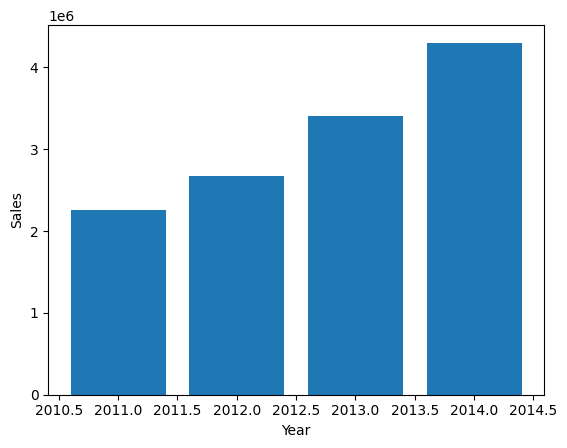

In [ ]:
year = range(2011,2015)
plt.bar(year,trans_fact_combined.groupby(['year']).sum()['sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [ ]:
trans_fact_combined['month_year']= trans_fact_combined['order_date'].apply(lambda x: x.strftime('%Y-%m'))
df_monthyear = trans_fact_combined.groupby('month_year').sum()['sales'].reset_index()
df_monthyear

<ipython-input-24-8d7ef59f52e7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthyear = trans_fact_combined.groupby('month_year').sum()['sales'].reset_index()


,month_year,sales
0,2011-01,138241.30042
1,2011-02,134969.94086
2,2011-03,171455.59372
3,2011-04,128833.47034
4,2011-05,148146.72092
5,2011-06,189338.43966
6,2011-07,162034.69756
7,2011-08,219223.49524
8,2011-09,255237.89698
9,2011-10,204675.07846


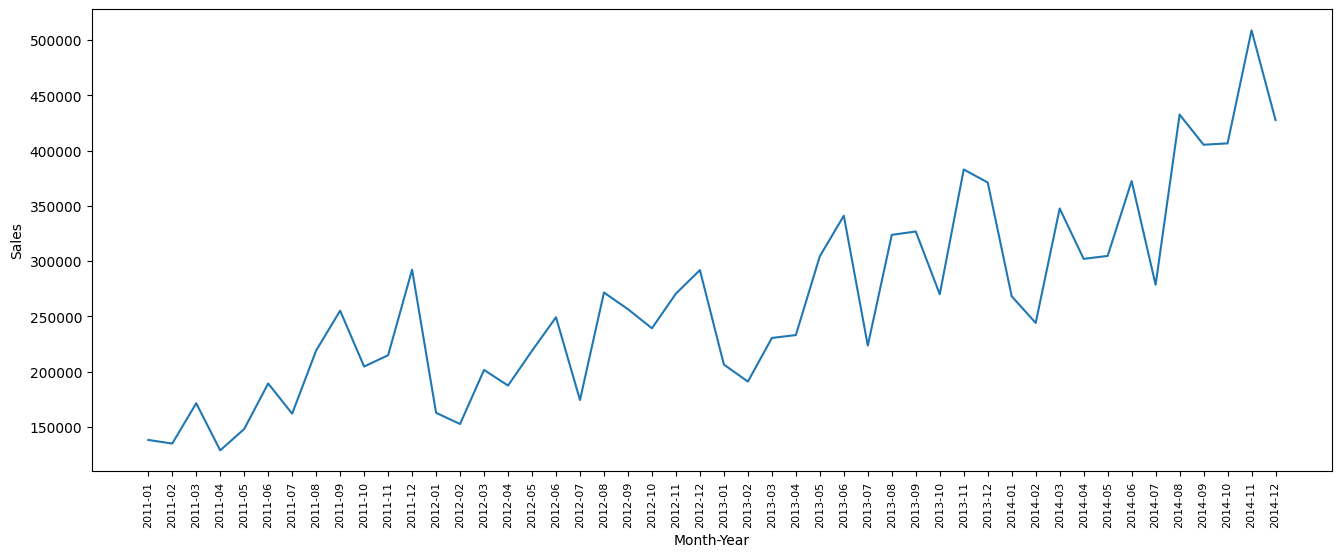

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(df_trend['month_year'],df_trend['sales'])
plt.xticks(rotation = 'vertical', size=8)
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.show()

# Importing Product, Customer, and Shipment details


In [ ]:
customer_df = pd.read_csv('customer.csv')
product_df = pd.read_csv('product.csv')
shipping_df = pd.read_csv('shipping_destination.csv')

In [ ]:
print("Number of rows in customer.csv: ", len(customer_df))
print("Number of rows in product.csv: ", len(product_df))
print("Number of rows in shipping_destination.csv: ", len(shipping_df))

print("\nMetadata(Customer): ")
customer_df.info()

print("\nMetadata(Product): ")
product_df.info()

print("\nMetadata(Shipping_destination): ")
shipping_df.info()

Number of rows in customer.csv:  1590
Number of rows in product.csv:  10768
Number of rows in shipping_destination.csv:  25724

Metadata(Customer): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1590 non-null   object
 1   customer_name  1590 non-null   object
 2   segment        1590 non-null   object
dtypes: object(3)
memory usage: 37.4+ KB

Metadata(Product): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10768 entries, 0 to 10767
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    10768 non-null  object
 1   category      10768 non-null  object
 2   sub_category  10768 non-null  object
 3   product_name  10768 non-null  object
dtypes: object(4)
memory usage: 336.6+ KB

Metadata(Shipping_destination): 
<class 'pandas.core.frame.DataFr

In [ ]:
#Correcting discrepency in naming of order-id

shipping_df = shipping_df.rename(columns={'order-id': 'order_id'})

print("\nMetadata(Shipping_destination): ")
shipping_df.info()


Metadata(Shipping_destination): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25724 entries, 0 to 25723
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     25724 non-null  object 
 1   city         25724 non-null  object 
 2   state        25724 non-null  object 
 3   country      25724 non-null  object 
 4   postal_code  5009 non-null   float64
 5   market       25724 non-null  object 
 6   region       25724 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.4+ MB


In [ ]:
#Checking if foreign keys from transaction satisfy unique constraint

if product_df['product_id'].is_unique:
    print('All values in the column are unique.')
else:
    print('There are duplicate values in the column.')

There are duplicate values in the column.


In [ ]:
#Remove duplicates in product_df by taking first occurence

print(len(product_df))

product_df.drop_duplicates(subset='product_id', keep='first', inplace=True)

print(len(product_df))

10768
10292


In [ ]:
customer_df.customer_id.unique()
if customer_df['customer_id'].is_unique:
    print('All values in the column are unique.')
else:
    print('There are duplicate values in the column.')

All values in the column are unique.


In [ ]:
shipping_df.order_id.unique()
if shipping_df['order_id'].is_unique:
    print('All values in the column are unique.')
else:
    print('There are duplicate values in the column.')

There are duplicate values in the column.


In [ ]:
#Remove duplicates in shipping_df by taking first occurence

print(len(shipping_df))

shipping_df.drop_duplicates(subset='order_id', keep='first', inplace=True)

print(len(shipping_df))

25724
25035


# Join Transaction details with other details

In [ ]:
print("Number of rows before merge: ", len(trans_fact_combined))

merged_df = pd.merge(trans_fact_combined, customer_df, on='customer_id', how='left')
merged_df = pd.merge(merged_df, product_df, on='product_id', how='left')
merged_df = pd.merge(merged_df, shipping_df, on='order_id', how='left')

print("Number of rows after merge: ", len(merged_df))

if merged_df['row_id'].is_unique:
    print('All values in the column are unique.')
else:
    print('There are duplicate values in the column.')

merged_df.head()

Number of rows before merge:  51290
Number of rows after merge:  51290
All values in the column are unique.


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,...,segment,category,sub_category,product_name,city,state,country,postal_code,market,region
0,49,MX-2011-127145,2011-12-06,2011-06-17,Standard Class,SF-20200,FUR-FU-10003608,26.76000,2,0.000,...,Consumer,Furniture,Furnishings,"Tenex Light Bulb, Erganomic",São Benedito,Ceará,Brazil,NaN,LATAM,South
1,51,MX-2011-168662,2011-10-13,2011-10-18,Second Class,KC-16255,OFF-SU-10003665,66.88000,4,0.000,...,Corporate,Office Supplies,Supplies,"Kleencut Trimmer, Serrated",Toluca,México,Mexico,NaN,LATAM,North
2,52,US-2011-150987,2011-02-04,2011-04-06,Second Class,DW-13480,TEC-CO-10003142,230.67252,3,0.402,...,Home Office,Technology,Copiers,"Hewlett Fax and Copier, Laser",Tegucigalpa,Francisco Morazán,Honduras,NaN,LATAM,Central
3,53,US-2011-150987,2011-02-04,2011-04-06,Second Class,DW-13480,TEC-CO-10001756,172.43928,3,0.402,...,Home Office,Technology,Copiers,"Canon Personal Copier, Color",Tegucigalpa,Francisco Morazán,Honduras,NaN,LATAM,Central
4,54,US-2011-150987,2011-02-04,2011-04-06,Second Class,DW-13480,OFF-AP-10004958,683.49600,3,0.400,...,Home Office,Office Supplies,Appliances,"KitchenAid Stove, Black",Tegucigalpa,Francisco Morazán,Honduras,NaN,LATAM,Central


In [ ]:
merged_df.to_csv("all_data_combined.csv", index=False)

# Data Exploration and visualization

In [ ]:
prod_sales=pd.DataFrame(merged_df.groupby('product_name').sum()['sales'])
prod_sales

<ipython-input-45-83243e5edcb7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod_sales=pd.DataFrame(merged_df.groupby('product_name').sum()['sales'])


,sales
product_name,
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",146.688
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


# Top Products by Sales

In [ ]:
prod_sales=prod_sales.sort_values('sales',inplace=True ,ascending=False)
print("Most Selling products by sale: ")
prod_sales.head(10)

Most Selling products by sale: 


,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",51449.8038
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Apple Smart Phone, Full Size'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Nokia Smart Phone, Full Size'),
  Text(4, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(5, 0, 'Hon Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Office Star Executive Leather Armchair, Adjustable'),
  Text(7, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(8, 0, 'Samsung Smart Phone, Cordless'),
  Text(9, 0, 'Nokia Smart Phone, with Caller ID')])

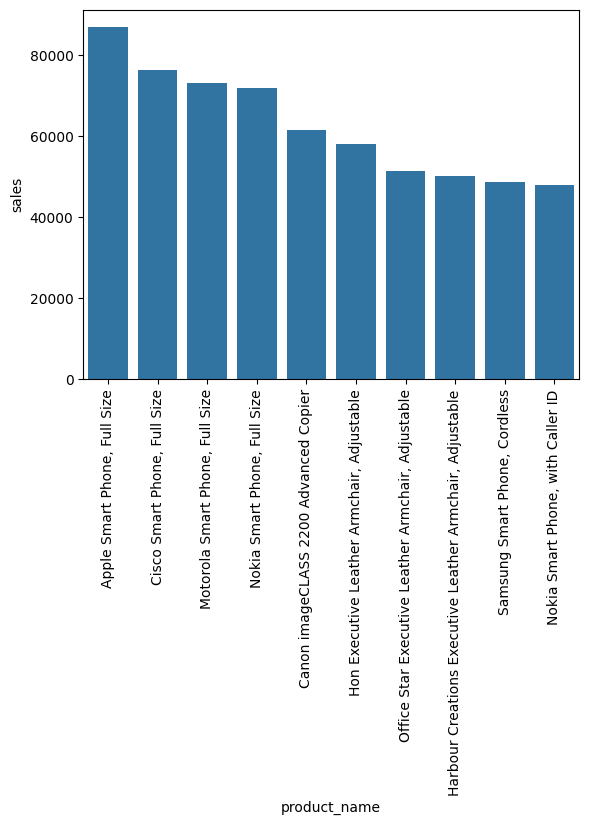

In [ ]:
sns.barplot(x='product_name',y='sales',data=prod_sales.head(10).reset_index())
plt.xticks(rotation = 'vertical')

# Top products by Profit

In [ ]:
profitable_products = pd.DataFrame(merged_df.groupby(['product_name']).sum()['profit'])
profitable_products.sort_values(by=['profit'], inplace = True, ascending = False)
print("Most Profitable Products: ")
profitable_products.head(10)

<ipython-input-70-1bdfb660fb44>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profitable_products = pd.DataFrame(merged_df.groupby(['product_name']).sum()['profit'])


,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11651.6810
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9535.5408
"Nokia Smart Phone, with Caller ID",9465.3257


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Hoover Stove, Red'),
  Text(4, 0, 'Sauder Classic Bookcase, Traditional'),
  Text(5, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Nokia Smart Phone, Full Size'),
  Text(7, 0, 'Cisco Smart Phone, with Caller ID'),
  Text(8, 0, 'Nokia Smart Phone, with Caller ID'),
  Text(9, 0, 'Belkin Router, USB')])

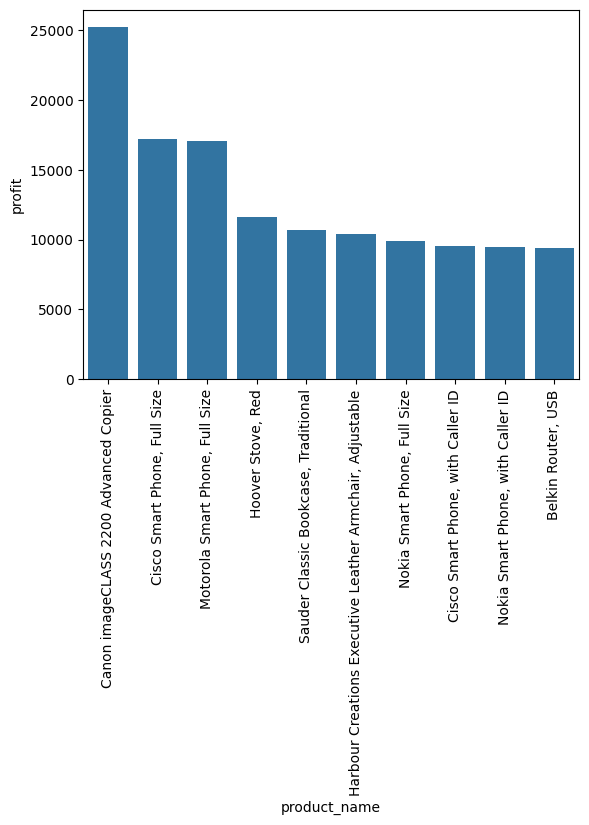

In [ ]:
sns.barplot(x='product_name',y='profit',data=profitable_products.head(10).reset_index())
plt.xticks(rotation = 'vertical')

# Top products by quantity

In [ ]:
prod_quantity= pd.DataFrame(merged_df.groupby('product_name').sum()['quantity'])
prod_quantity

<ipython-input-48-50171178d07e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod_quantity= pd.DataFrame(merged_df.groupby('product_name').sum()['quantity'])


,quantity
product_name,
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",21
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",24
iOttie HLCRIO102 Car Mount,12
iOttie XL Car Mount,14


In [ ]:
prod_quantity=prod_quantity.sort_values('quantity',ascending=False)

print("Most Selling products by quantity: ")
prod_quantity.head(10)


Most Selling products by quantity: 


,quantity
product_name,
Staples,849
"Cardinal Index Tab, Clear",382
"Eldon File Cart, Single Width",370
"Sanford Pencil Sharpener, Water Color",285
"Stockwell Paper Clips, Assorted Sizes",270
"Rogers File Cart, Single Width",267
"Sanford Pencil Sharpener, Easy-Erase",263
"Stanley Pencil Sharpener, Water Color",263
"Smead File Cart, Single Width",250


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Cardinal Index Tab, Clear'),
  Text(2, 0, 'Eldon File Cart, Single Width'),
  Text(3, 0, 'Sanford Pencil Sharpener, Water Color'),
  Text(4, 0, 'Stockwell Paper Clips, Assorted Sizes'),
  Text(5, 0, 'Rogers File Cart, Single Width'),
  Text(6, 0, 'Sanford Pencil Sharpener, Easy-Erase'),
  Text(7, 0, 'Stanley Pencil Sharpener, Water Color'),
  Text(8, 0, 'Smead File Cart, Single Width'),
  Text(9, 0, 'Avery Index Tab, Clear')])

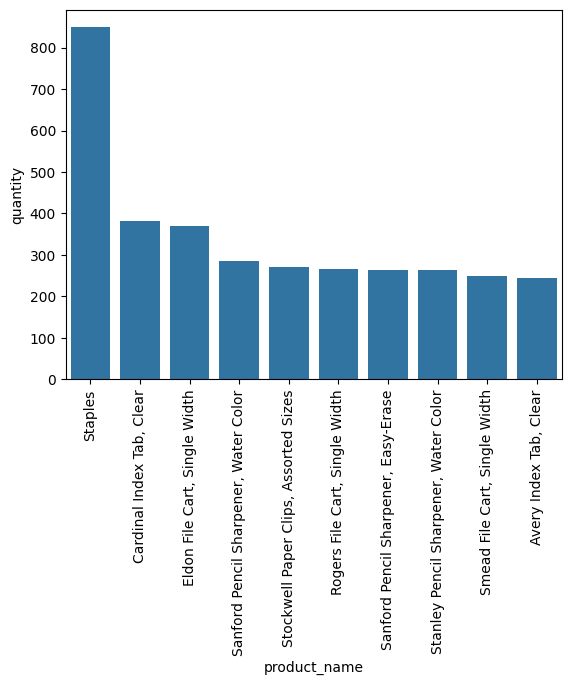

In [ ]:
top_prod = merged_df.groupby('product_name').agg({'quantity': 'sum'}).sort_values('quantity',ascending=False)[:10]
sns.barplot(x='product_name',y='quantity',data=top_prod.reset_index())
plt.xticks(rotation = 'vertical')

# Most used shipment mode

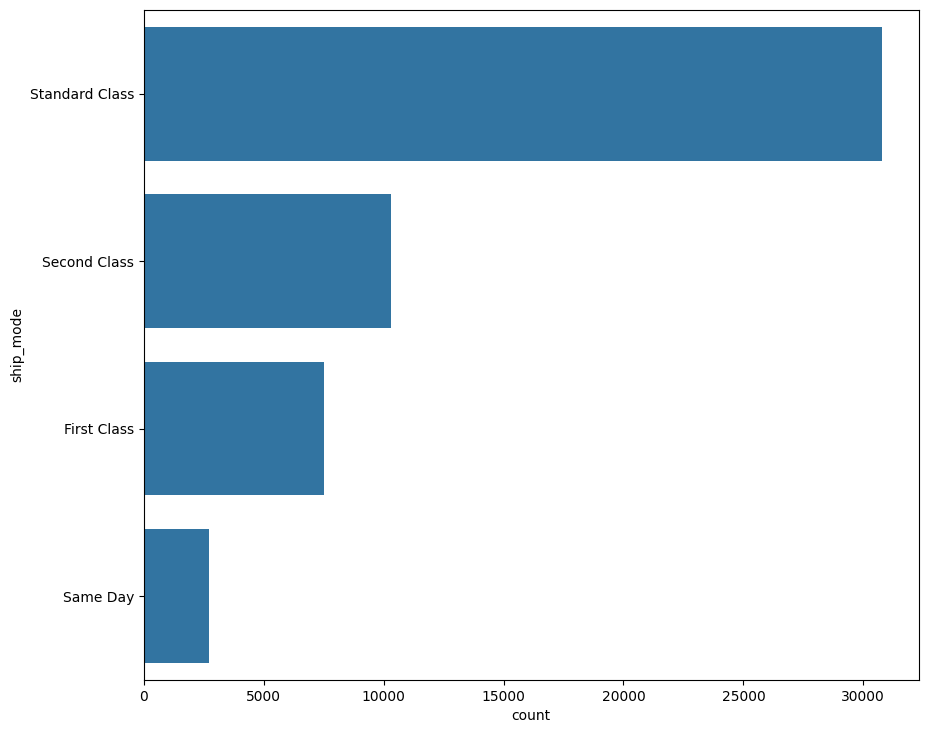

In [ ]:
plt.figure(figsize=(10,8.7))

sns.countplot(merged_df['ship_mode'])
plt.show()

# Top profitable categories and subcategories

In [ ]:
cat_subcat_profit=pd.DataFrame(merged_df.groupby(['category','sub_category']).sum()['profit'])
cat_subcat_profit

<ipython-input-60-54dae4eaf5eb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_subcat_profit=pd.DataFrame(merged_df.groupby(['category','sub_category']).sum()['profit'])


profit
category        sub_category              
Furniture       Bookcases     161924.41950
                Chairs        140396.26750
                Furnishings    46967.42550
                Tables        -64083.38870
Office Supplies Appliances    141680.58940
                Art            57953.91090
                Binders        72451.50200
                Envelopes      29601.11630
                Fasteners      11525.42410
                Labels         15008.85600
                Paper          59207.68270
                Storage       108461.48980
                Supplies       22583.26310
Technology      Accessories   129626.30620
                Copiers       258567.54818
                Machines       58867.87300
                Phones        216717.00580

# 10 Most profitable products

In [ ]:
print("Top 10 products by profit: ")
cat_subcat_profit = cat_subcat_profit.sort_values(['category','profit'],ascending=False)
cat_subcat_profit.head(10)

Top 10 products by profit: 


profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72451.50200
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630

# 10 Least Profitable Products

In [ ]:
print("Last 10 products by profit: ")
cat_subcat_profit = cat_subcat_profit.sort_values(['category','profit'])
cat_subcat_profit.head(10)

Last 10 products by profit: 


profit
category        sub_category             
Furniture       Tables        -64083.3887
                Furnishings    46967.4255
                Chairs        140396.2675
                Bookcases     161924.4195
Office Supplies Fasteners      11525.4241
                Labels         15008.8560
                Supplies       22583.2631
                Envelopes      29601.1163
                Art            57953.9109
                Paper          59207.6827

# Most profitable region

In [ ]:
region_profit=pd.DataFrame(merged_df.groupby(('region')).sum()['profit'])
region_profit

<ipython-input-64-146dd7d75633>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_profit=pd.DataFrame(merged_df.groupby(('region')).sum()['profit'])


,profit
region,
Africa,88871.63100
Canada,17817.39000
Caribbean,34559.87164
Central,312478.18146
Central Asia,132480.18700
EMEA,43897.97100
East,90935.65106
North,194571.22904
North Asia,165578.42100


In [ ]:
region_profit=region_profit.sort_values('profit',ascending=False)

print("Most Profitable Regions: ")
region_profit.head(10)

Most Profitable Regions: 


,profit
region,
Central,312478.18146
North,194571.22904
North Asia,165578.42100
South,140717.25338
Central Asia,132480.18700
Oceania,120089.11200
West,107608.06370
East,90935.65106
Africa,88871.63100


# Profit by category

In [ ]:
profitable_category = pd.DataFrame(merged_df.groupby(['category']).sum()['profit'])
profitable_category.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_category

<ipython-input-73-792a2d362485>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profitable_category = pd.DataFrame(merged_df.groupby(['category']).sum()['profit'])


,profit
category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,285204.72380


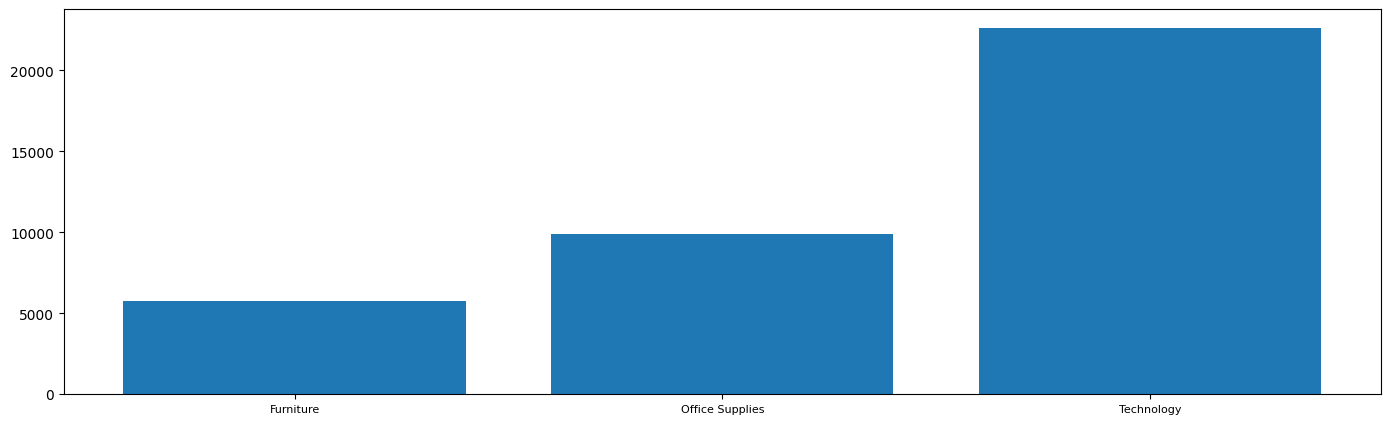

In [78]:

plt.figure(figsize=(17, 5))
plt.bar(merged_df['category'],merged_df['sales'])
plt.xticks(size=8)
plt.show()

# Profit by segment

In [79]:
profitable_segment = pd.DataFrame(merged_df.groupby(['segment']).sum()['profit'])
profitable_segment.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_segment

<ipython-input-79-b4ccf19c4ba2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profitable_segment = pd.DataFrame(merged_df.groupby(['segment']).sum()['profit'])


,profit
segment,
Consumer,749239.78206
Corporate,441208.32866
Home Office,277009.18056


([0, 1, 2],
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

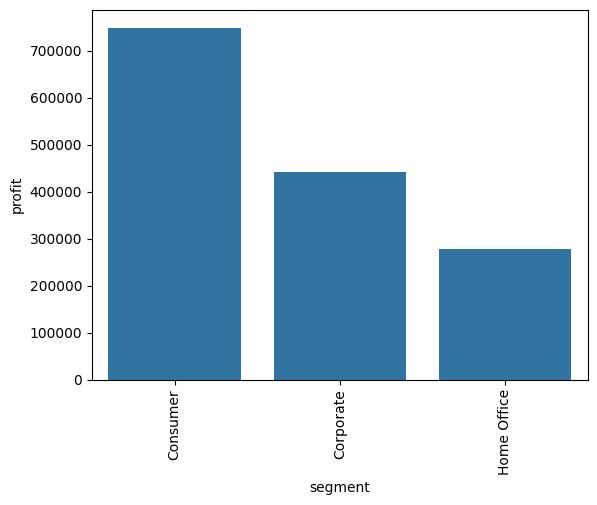

In [80]:
sns.barplot(x='segment',y='profit',data=profitable_segment.reset_index())
plt.xticks(rotation = 'vertical')

# Sales for shipment modes

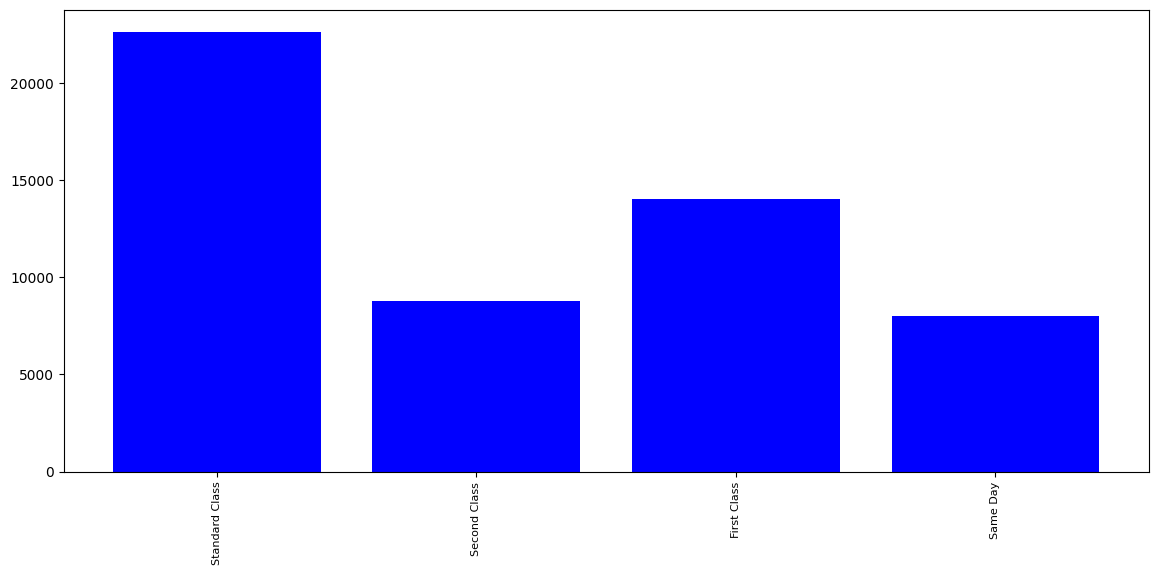

In [81]:
plt.figure(figsize=(14, 6))
plt.bar(merged_df['ship_mode'],merged_df['sales'],color = 'b')
plt.xticks(rotation='vertical', size=8)
plt.show()

# Category Composition for shipment modes

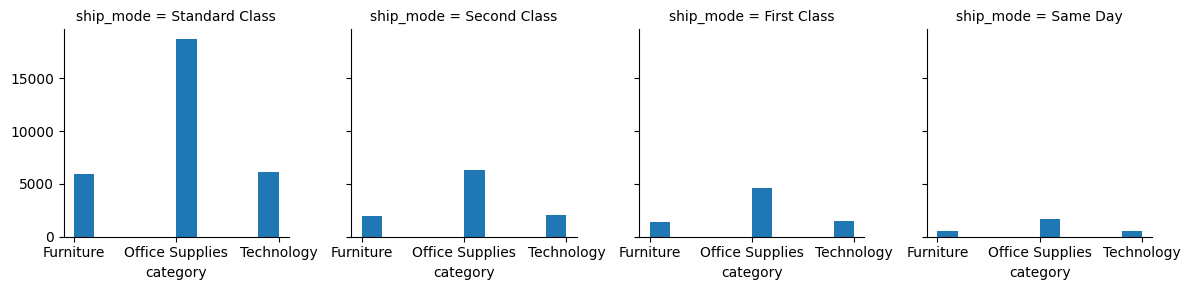

In [83]:
category_hist = sns.FacetGrid(merged_df, col='ship_mode')
category_hist.map(plt.hist, 'category')

# Product sales in each market

<ipython-input-84-8ee1f5f3063a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='market',data=merged_df, palette='rainbow')


<Axes: xlabel='market', ylabel='count'>

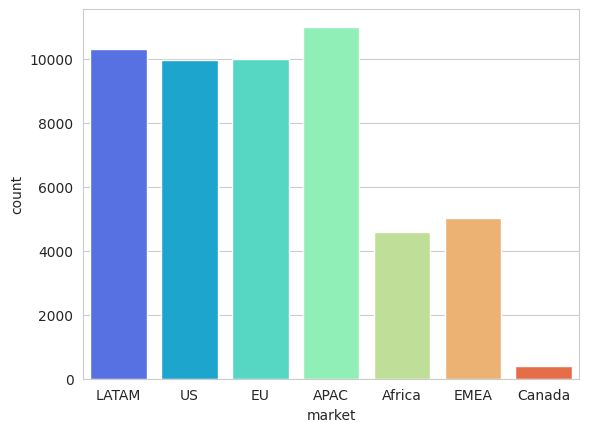

In [84]:
sns.set_style('whitegrid')
sns.countplot(x='market',data=merged_df, palette='rainbow')

# Sales by country

In [85]:
countries = pd.DataFrame(merged_df.groupby('country').sum()['sales'])
countries.sort_values('sales',inplace=True, ascending=False)
countries.head(10)

<ipython-input-85-a8db5728db04>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countries = pd.DataFrame(merged_df.groupby('country').sum()['sales'])


,sales
country,
United States,2.293665e+06
Australia,9.252359e+05
France,8.610516e+05
China,7.005620e+05
Germany,6.286962e+05
Mexico,6.231444e+05
India,5.896501e+05
United Kingdom,5.271485e+05
Indonesia,4.048875e+05


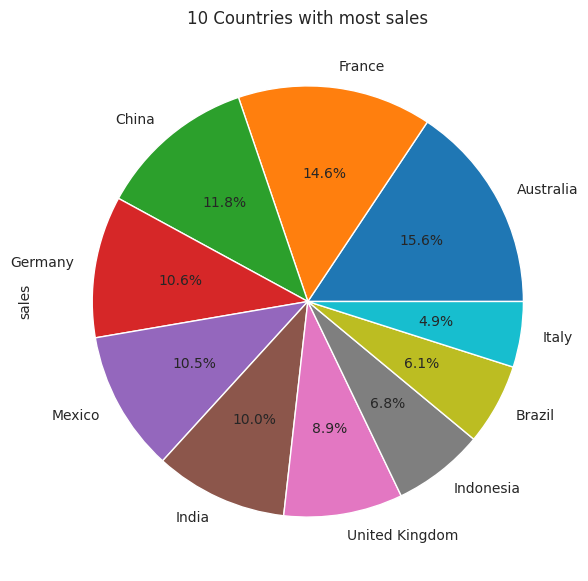

In [86]:
countries = countries.sort_values(by = 'sales',ascending = False)[1:11]
countries['sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('10 Countries with most sales')
plt.show()

# Average shipping cost for countries

In [87]:
merged_df.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost', ascending=False).head(10)

,shipping_cost
country,
Taiwan,155.660714
Chad,148.970000
Lesotho,135.650000
Montenegro,93.937500
Slovenia,61.220000
Republic of the Congo,59.303333
Central African Republic,57.625714
Namibia,50.370000
Bangladesh,46.402883


# Top 10 customers by profit

In [88]:
data10 = merged_df.sort_values('profit',ascending=False).head(10)[['order_id','customer_name','profit']]
data10

,order_id,customer_name,profit
19241,CA-2013-118689,Tamara Chand,8399.9760
47126,CA-2014-140151,Raymond Buch,6719.9808
45754,CA-2014-166709,Hunter Lopez,5039.9856
19853,CA-2013-117121,Adrian Barton,4946.3700
6155,CA-2011-116904,Sanjit Chand,4630.4755
37753,ES-2014-1651774,Patrick Jones,3979.0800
45221,CA-2014-127180,Tom Ashbrook,3919.9888
29726,CA-2012-145352,Christopher Martinez,3177.4750
4709,ID-2011-64599,Carol Adams,2939.3100
15413,IN-2013-50809,Cynthia Arntzen,2817.9900
